In [3]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import torch
from torch.nn import Linear, MSELoss
from torch.optim import SGD

from helper_functions import fit, evaluate_model, scale_data, draw_epochs_losses

In [4]:
print(os.listdir("../Data/Input"))

['Life Expectancy Data.csv', 'Test', 'Train']


# **1 &nbsp;&nbsp;&nbsp; Load Data**

In [2]:
train_df = pd.read_csv("../Data/Input/Train/train.csv")
test_df = pd.read_csv("../Data/Input/Test/test.csv")

# **2 &nbsp;&nbsp;&nbsp; Standardize Data**

In [4]:
# Get the features and target
stratified_features_train = train_df[["Status", "Income composition of resources"]]
stratified_features_test = test_df[["Status", "Income composition of resources"]]

stratified_target_train = train_df["Life expectancy "]
stratified_target_test = test_df["Life expectancy "]

In [5]:
# Convert to tensor
X_stratified_train = torch.tensor(stratified_features_train.values, dtype=torch.float32)
y_stratified_train = torch.tensor(stratified_target_train.values, dtype=torch.float32).view(-1, 1)

X_stratified_test = torch.tensor(stratified_features_test.values, dtype=torch.float32)
y_stratified_test = torch.tensor(stratified_target_test.values, dtype=torch.float32).view(-1, 1)

In [6]:
# Scale data
X_stratified_train[:, 1] = scale_data(X_stratified_train[:, 1])
y_stratified_train = scale_data(y_stratified_train)

X_stratified_test[:, 1] = scale_data(X_stratified_test[:, 1])
y_stratified_test = scale_data(y_stratified_test)

# **3 &nbsp;&nbsp;&nbsp; Declare Model**

In [7]:
zero_digit_index_train = X_stratified_train[:, 0] == 0
one_digit_index_train = X_stratified_train[:, 0] == 1

In [8]:
stratified_model = {
    "0": Linear(in_features=X_stratified_train.shape[1], out_features=1),
    "1": Linear(in_features=X_stratified_train.shape[1], out_features=1)
}
for i, (_, sub_model) in enumerate(stratified_model.items()):
    print(f"Sub Model {i}:")
    for param in sub_model.parameters():
        print(param)

Sub Model 0:
Parameter containing:
tensor([[ 0.3329, -0.1871]], requires_grad=True)
Parameter containing:
tensor([0.3585], requires_grad=True)
Sub Model 1:
Parameter containing:
tensor([[ 0.1268, -0.5253]], requires_grad=True)
Parameter containing:
tensor([0.3112], requires_grad=True)


# **4 &nbsp;&nbsp;&nbsp; Train Model**

In [9]:
stratified_model["0"], stratified_0_epochs_losses = fit(
    stratified_model["0"],
    criterion=MSELoss(),
    optimizer=SGD(stratified_model["0"].parameters(), lr=0.01),
    train_data=X_stratified_train[zero_digit_index_train],
    train_target=y_stratified_train[zero_digit_index_train],
    epochs=2000,
    n_iter_not_change=500,
    lr_decay=0.1
)

Epoch [1/2000], Loss: 1.0721, LR: 0.01000
Epoch [100/2000], Loss: 0.1241, LR: 0.01000
Epoch [200/2000], Loss: 0.1225, LR: 0.01000
Epoch [300/2000], Loss: 0.1214, LR: 0.01000
Epoch [400/2000], Loss: 0.1206, LR: 0.01000
Epoch [500/2000], Loss: 0.1201, LR: 0.01000
Epoch [600/2000], Loss: 0.1200, LR: 0.00100
Epoch [700/2000], Loss: 0.1200, LR: 0.00100
Epoch [800/2000], Loss: 0.1200, LR: 0.00100
Epoch [900/2000], Loss: 0.1199, LR: 0.00100
Epoch [1000/2000], Loss: 0.1199, LR: 0.00100
Epoch [1100/2000], Loss: 0.1199, LR: 0.00010
Epoch [1200/2000], Loss: 0.1199, LR: 0.00010
Epoch [1300/2000], Loss: 0.1199, LR: 0.00010
Epoch [1400/2000], Loss: 0.1199, LR: 0.00010
Epoch [1500/2000], Loss: 0.1199, LR: 0.00010
Epoch [1600/2000], Loss: 0.1199, LR: 0.00001
Epoch [1700/2000], Loss: 0.1199, LR: 0.00001
Epoch [1800/2000], Loss: 0.1199, LR: 0.00001
Epoch [1900/2000], Loss: 0.1199, LR: 0.00001
Epoch [2000/2000], Loss: 0.1199, LR: 0.00001


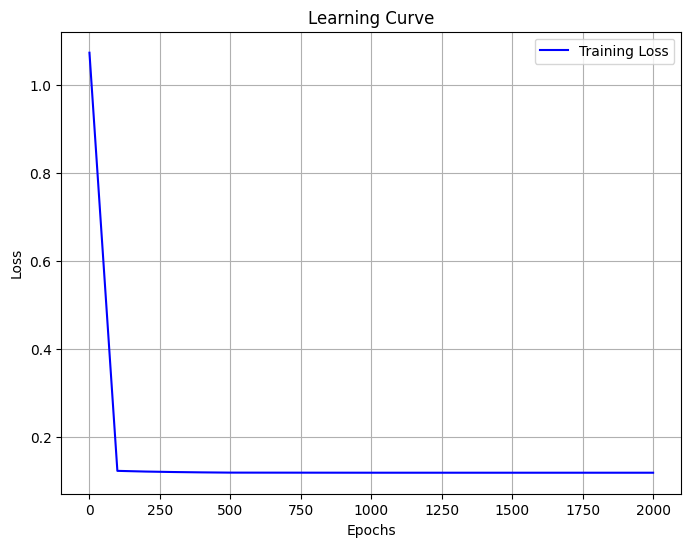

In [10]:
draw_epochs_losses(stratified_0_epochs_losses)

In [11]:
stratified_model["1"], stratified_1_epochs_losses = fit(
    stratified_model["1"],
    criterion=MSELoss(),
    optimizer=SGD(stratified_model["1"].parameters(), lr=0.01),
    train_data=X_stratified_train[one_digit_index_train],
    train_target=y_stratified_train[one_digit_index_train],
    epochs=2000,
    n_iter_not_change=500,
    lr_decay=0.1
)

Epoch [1/2000], Loss: 2.4254, LR: 0.01000
Epoch [100/2000], Loss: 0.4005, LR: 0.01000
Epoch [200/2000], Loss: 0.3530, LR: 0.01000
Epoch [300/2000], Loss: 0.3510, LR: 0.01000
Epoch [400/2000], Loss: 0.3510, LR: 0.01000
Epoch [500/2000], Loss: 0.3509, LR: 0.01000
Epoch [600/2000], Loss: 0.3509, LR: 0.00100
Epoch [700/2000], Loss: 0.3509, LR: 0.00100
Epoch [800/2000], Loss: 0.3509, LR: 0.00100
Epoch [900/2000], Loss: 0.3509, LR: 0.00100
Epoch [1000/2000], Loss: 0.3509, LR: 0.00100
Epoch [1100/2000], Loss: 0.3509, LR: 0.00010
Epoch [1200/2000], Loss: 0.3509, LR: 0.00010
Epoch [1300/2000], Loss: 0.3509, LR: 0.00010
Epoch [1400/2000], Loss: 0.3509, LR: 0.00010
Epoch [1500/2000], Loss: 0.3509, LR: 0.00010
Epoch [1600/2000], Loss: 0.3509, LR: 0.00001
Epoch [1700/2000], Loss: 0.3509, LR: 0.00001
Epoch [1800/2000], Loss: 0.3509, LR: 0.00001
Epoch [1900/2000], Loss: 0.3509, LR: 0.00001
Epoch [2000/2000], Loss: 0.3509, LR: 0.00001


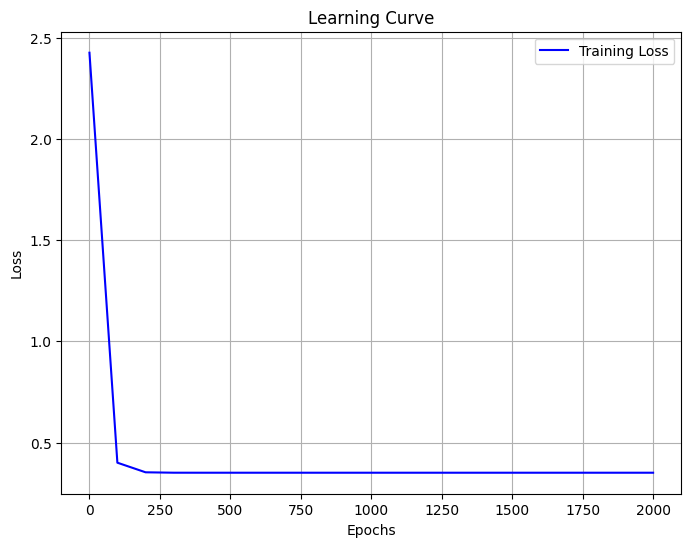

In [12]:
draw_epochs_losses(stratified_1_epochs_losses)

# **5 &nbsp;&nbsp;&nbsp; Evaluate Model**

In [13]:
zero_digit_index_test = X_stratified_test[:, 0] == 0
one_digit_index_test = X_stratified_test[:, 0] == 1

In [14]:
y_test = torch.cat((y_stratified_test[zero_digit_index_test], y_stratified_test[one_digit_index_test]), dim=0)
with torch.no_grad():
    y_pred = torch.cat((
        stratified_model["0"](X_stratified_test[zero_digit_index_test]),
        stratified_model["1"](X_stratified_test[one_digit_index_test])
    ), dim=0)

stratified_loss = MSELoss()(y_pred, y_test)
print("Model loss:", stratified_loss.item())

Model loss: 0.29471901059150696


In [15]:
print("0 Submodel:")
print("Model weights:", stratified_model["0"].weight)
print("Model bias:", stratified_model["0"].bias)

print("1 Submodel:")
print("Model weights:", stratified_model["1"].weight)
print("Model bias:", stratified_model["1"].bias)

0 Submodel:
Model weights: Parameter containing:
tensor([[0.3329, 0.4086]], requires_grad=True)
Model bias: Parameter containing:
tensor([0.5921], requires_grad=True)
1 Submodel:
Model weights: Parameter containing:
tensor([[-0.1035,  0.8112]], requires_grad=True)
Model bias: Parameter containing:
tensor([0.0809], requires_grad=True)


# **6 &nbsp;&nbsp;&nbsp; Write to File**

In [ ]:
torch.save(stratified_model["0"].state_dict(), "../Data/Output/StratifiedFeatureModel/stratified_feature_model_0.pth")

In [ ]:
torch.save(stratified_model["1"].state_dict(), "../Data/Output/StratifiedFeatureModel/stratified_feature_model_1.pth")